In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [46]:
# open the data file
with h5py.File('../CodePass2/runs/no_close_longterm_3.hdf5', 'r') as f:
    # read the data
    x = f['x'][:]
 

# find voronoi diagram
from scipy.spatial import Delaunay


def get_nbs(xs) -> set:
    tri = Delaunay(xs)
    indsx, all_neighbors = tri.vertex_neighbor_vertices

    neighbors = []
    for i in range(len(indsx)-1):
        neighbors.append(set(all_neighbors[indsx[i]:indsx[i+1]]))

    return neighbors


In [28]:
iii = 0
nbs_0 = get_nbs(x[iii*1])
nbs_1 = get_nbs(x[(iii+1)*1])



In [29]:
dists

[[3.2807527,
  1.8724256,
  2.0056689,
  1.8633732,
  2.8318775,
  4.4024034,
  2.6086001,
  1.8784713],
 [3.9743571,
  1.7569171,
  1.683231,
  2.4585867,
  3.0888484,
  2.807486,
  2.2683806,
  2.7339144,
  1.8856686],
 [2.1014135,
  2.3255055,
  2.4994774,
  8.748046,
  2.2184596,
  4.620364,
  2.3846846,
  2.1346428,
  4.057898,
  7.497113,
  12.752884,
  7.1628404,
  3.457445,
  10.735755,
  4.875747,
  10.122627,
  2.1035767],
 [2.697785,
  3.963953,
  2.696891,
  3.3394392,
  1.9952949,
  2.0017302,
  1.6790186,
  3.2362516,
  2.7400408,
  1.7748365],
 [5.113235,
  5.398668,
  7.564501,
  3.747345,
  3.4589496,
  2.19918,
  2.6382518,
  2.9556553,
  2.2716897,
  3.2963066,
  4.0414057,
  9.772279,
  2.140219,
  4.854922,
  2.6149056,
  7.9867587,
  5.3351655],
 [2.3895073,
  2.1808364,
  4.2414694,
  5.4966145,
  12.124544,
  5.2123275,
  2.0887773,
  3.6273985,
  5.4617834,
  11.003171,
  13.048181,
  10.4464245,
  3.2528355,
  1.9808786,
  1.9873705,
  3.8570917,
  3.3359454],

26.656801

In [74]:
countss = []

for iii in range(0,30):

    counts = 0
    xx0 = x[iii]
    xx1 = x[iii+1]

    # xx1 = xx1[xx0[:,2] < 0]
    # xx0 = xx0[xx0[:,2] < 0]

    nbs_0 : set = get_nbs(xx0)
    nbs_1 : set = get_nbs(xx1)

    pairs = []

    for i in range(len(nbs_0)):
        if xx0[i,2] > 0:
            continue
        
        shouldbreak = False
        new_nbs = nbs_1[i] - nbs_0[i]
        for new_nb in new_nbs:
            if set([i, new_nb]) in pairs:
                continue
            pairs.append(set([i, new_nb]))


            dist = np.array([np.linalg.norm(x[iii,i] - x[iii,new_nb])])

            if dist > 6:
                continue

            nb_nbs = nbs_1[new_nb]
            overlap = nb_nbs & nbs_1[i]
            
            count = 0
            for common_nb in overlap:
                common_ns_prev_nbs = nbs_0[common_nb]
                common_nb_new_nbs = nbs_1[common_nb]

                overlapx2 = (common_ns_prev_nbs - common_nb_new_nbs) & overlap 

                if len(overlapx2) > 0:
                    counts += 1
                    shouldbreak = True
                    break

            if shouldbreak:
                break


    countss.append(counts)





{3814}
{1618}
{4574}
{119}
{2613, 190}
{2181}
{2442}
{1702}
{3082, 1810}
{240}
{1820, 959}
{4857}
{1710}
{1611}
{3192}
{1131}
{3060}
{3868, 342}
{3773}
{1877}
{3798}
{575}
{2453}
{3705}
{542}
{799}
{4668}
{1340}
{37}
{3773}
{2333}
{1172}
{975}
{1631}
{3079}
{1245}
{2107}
{4459}
{1322, 1007}
{3121}
{4757}
{4238}
{1225, 4266, 1393}
{4402}
{1361}
{2003, 3038}
{1322}
{2956}
{3993}
{1648}
{4311}
{4010}
{4757}
{3038}
{3167}
{1564}
{3396}
{1558}
{3319}
{3733}
{158}
{765}
{3344}
{1949}
{1812}
{380}
{931}
{1861}
{4427}
{4525}
{4652}
{4928}
{1303}
{242}
{3356}
{154}
{340, 4526}
{3771}
{1968}
{2623}
{2565}
{2961, 1972}
{1758}
{2971}
{2811}
{3694}
{903}
{3611}
{1759}
{1643}
{4526}
{478}
{1336}
{4350}
{3787}
{3981}
{1620}
{2907}
{4907}
{4757}
{4622}
{4745, 858}
{1002}
{4632}
{1615}
{238}
{3356, 4630}
{154, 1611}
{1119}
{3182}
{3426}
{494}
{1485}
{1918}
{1239}
{3991}
{2776, 3193}
{4382}
{3084}
{1956}
{2743}
{502}
{1317}
{2384}
{4147}
{4796}
{2772}
{3733}
{116, 2958}
{550}
{4833}
{676}
{3934}
{3620, 

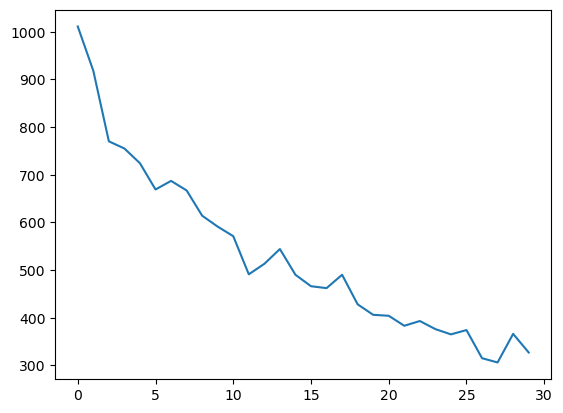

In [76]:
plt.plot(countss)

In [13]:
count_dict = {}
for cc in countss:
    unique, counts = np.unique(cc, return_counts=True)
    for u, c in zip(unique, counts):
        if u not in count_dict:
            count_dict[u] = [c]
        else:
            count_dict[u] += [c]


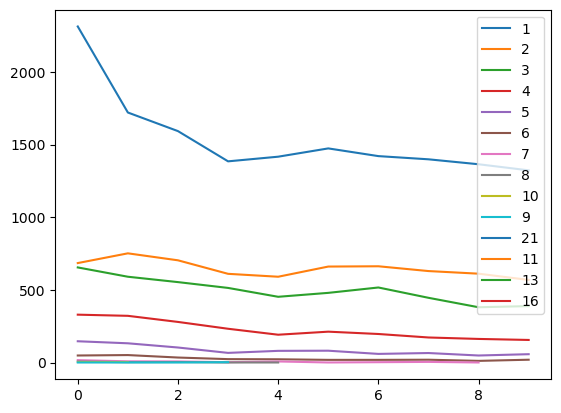

In [14]:


for key in count_dict:
    if key == 0:
        continue
    plt.plot(count_dict[key], label=key-1)

plt.legend()
plt.show()